# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.

To meet the requirements for this project, you will need to achieve an accuracy greater than 45%. 
If you want to beat Detectocorp's algorithm, you'll need to achieve an accuracy greater than 70%. 
(Beating Detectocorp's algorithm is not a requirement for passing this project, but you're encouraged to try!)

Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
#!pip install torch===1.5.0 torchvision===0.6.0 -f https://download.pytorch.org/whl/torch_stable.html
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(torch.__version__)

0.4.0


## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
## YOUR CODE HERE ##

#Training and Testing transforms
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5),(0.5,0.5,0.5))])

test_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5,0.5,0.5))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
dataset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=train_transforms, train=True)

#Defining training and testing size
train_size = int(0.8 * len(dataset))
validation_size = int(0.2 * len(dataset))

#Train validation data split
trainset, validationset = torch.utils.data.dataset.random_split(dataset, [train_size,validation_size])

#Train and validation data loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=500, shuffle=False)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
        image = images[i].numpy()
        print(image.shape)
        image = image/2 + 0.5
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

cat
(3, 32, 32)


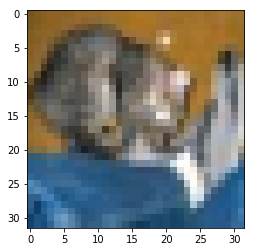

ship
(3, 32, 32)


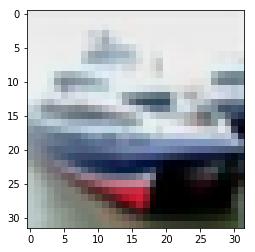

ship
(3, 32, 32)


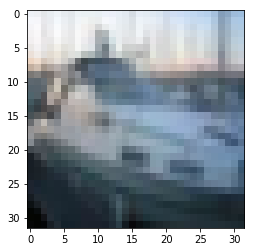

plane
(3, 32, 32)


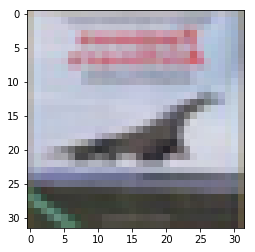

frog
(3, 32, 32)


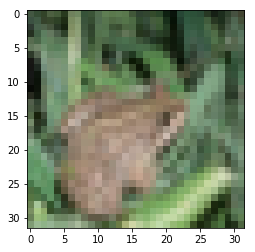

In [5]:
# Explore data
## YOUR CODE HERE ##
##original size of image is 32 * 32 as can be seen from the images below
show5(testloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [6]:
## YOUR CODE HERE ##

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072,784)
        self.fc2 = nn.Linear(784,256)
        self.fc3 = nn.Linear(256,64)
        self.fc6 = nn.Linear(64,10)
        
        #drop out
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,x):
        #flatten input tensor
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc6(x), dim=1)
        
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
## YOUR CODE HERE ##

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##
#setting up code to run on either GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

#instantiating variables
epochs = 30
steps = 0
running_loss = 0
print_loss_every = 250

train_losses, validation_losses = [],[]

for e in range(epochs):

    for images, labels in trainloader:
        steps += 1
        #loading images to GPU if available
        images, labels = images.to(device), labels.to(device)
        # updating the weights
        optimizer.zero_grad()
        #applying model to images
        log_ps = model(images)
        #calculating training loss
        loss = criterion(log_ps, labels)
        #performing backward propagation
        loss.backward()
        #updating weights
        optimizer.step()
        #updating runnin loss
        running_loss += loss.item()
        

        
    
    
    else:
        #instantiating loss and accuracy to zero
        validation_loss = 0
        accuracy = 0
        #turning off gradient to perform validation
        with torch.no_grad():
            #inform that we are in testing(evaluation mode to ignore dropout)
            model.eval()
            #loop through images
            for images, labels in validationloader:
                #Again load images to GPU if available 
                images, labels = images.to(device), labels.to(device)
                #apply model to images
                log_ps = model(images)
                #calculate validation loss
                validation_loss += criterion(log_ps, labels)
                
                #calculate accuracy
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        validation_losses.append(validation_loss/len(validationloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Validation Loss: {:.3f}.. ".format(validation_loss/len(validationloader)),
              "Validation Accuracy: {:.3f}".format(accuracy/len(validationloader)))
        running_loss = 0
        model.train()

Epoch: 1/30..  Training Loss: 1.997..  Validation Loss: 1.831..  Validation Accuracy: 0.355
Epoch: 2/30..  Training Loss: 1.850..  Validation Loss: 1.743..  Validation Accuracy: 0.374
Epoch: 3/30..  Training Loss: 1.787..  Validation Loss: 1.701..  Validation Accuracy: 0.386
Epoch: 4/30..  Training Loss: 1.755..  Validation Loss: 1.657..  Validation Accuracy: 0.405
Epoch: 5/30..  Training Loss: 1.723..  Validation Loss: 1.636..  Validation Accuracy: 0.415
Epoch: 6/30..  Training Loss: 1.693..  Validation Loss: 1.605..  Validation Accuracy: 0.420
Epoch: 7/30..  Training Loss: 1.664..  Validation Loss: 1.579..  Validation Accuracy: 0.434
Epoch: 8/30..  Training Loss: 1.639..  Validation Loss: 1.560..  Validation Accuracy: 0.445
Epoch: 9/30..  Training Loss: 1.623..  Validation Loss: 1.530..  Validation Accuracy: 0.457
Epoch: 10/30..  Training Loss: 1.601..  Validation Loss: 1.517..  Validation Accuracy: 0.459
Epoch: 11/30..  Training Loss: 1.586..  Validation Loss: 1.505..  Validation Ac

Plot the training loss (and validation loss/accuracy, if recorded).

Text(0.5,1,'Training Loss vs Validation Loss')

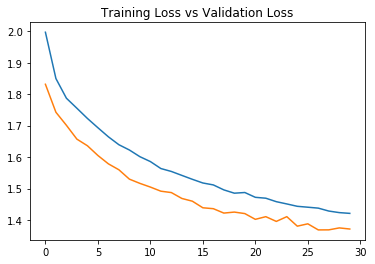

In [9]:
## YOUR CODE HERE ##
%matplotlib inline

plt.plot(train_losses, label = 'Training Loss')
plt.plot(validation_losses, label = 'Validation Loss')
plt.title("Training Loss vs Validation Loss")

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
## YOUR CODE HERE ##
correct = 0
total = 0

with torch.no_grad():
            #inform that we are in testing(evaluation mode to ignore dropout)
            model.eval()
            #loop through images
            for images, labels in testloader:
                #Again load images to GPU if available 
                images, labels = images.to(device), labels.to(device)
                #apply model to images
                log_ps = model(images)
                
                #calculate accuracy
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                total += labels.size(0)
                correct += (top_class == labels).sum().item()
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))
    
print("Test Accuracy: {:.3f}".format(correct/total))

Test Accuracy: 50.399


## Saving your model
Using `torch.save`, save your model for future loading.

In [9]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'Checkpoint1.pth')

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

Some things to consider as you formulate your recommendation:
* How does your model compare to Detectocorp's model?
* How does it compare to the far more advanced solutions in the literature? 
* What did you do to get the accuracy you achieved? 
* Is it necessary to improve this accuracy? If so, what sort of work would be involved in improving it?



**My recommendation is that they do not purchase the Detectocorp's model as its just a .2 difference and spending more time and work on the project will produce a model with better accuracy.My model has a 50% accuracy compared to Detectocorp's model. This was done in less than 3 hours of training and just an intro to pytorch course from udacity. I believe that this model just contains the basic building blocks of a deep neural network and does not encompass more advanced techniques which will greatly improve the model. To get this accuracy, I flipped the images in the train set and rotated them randomly, used the nn.Nllloss after the cross entropy gave a lower accuracy. I used Adam optimizers as it is more advanced that SGD. I believe to improve this model, a deep CNN model should be employed as I feel this model is near its limit. Also, other advanced techniques as as Regularization and so on should be implemented**



## Submit Your Project

When you are finished editing the notebook and are ready to turn it in, simply click the **SUBMIT PROJECT** button in the lower right.

Once you submit your project, we'll review your work and give you feedback if there's anything that you need to work on. If you'd like to see the exact points that your reviewer will check for when looking at your work, you can have a look over the project [rubric](https://review.udacity.com/#!/rubrics/3077/view).